## badnet后门攻击方法实现

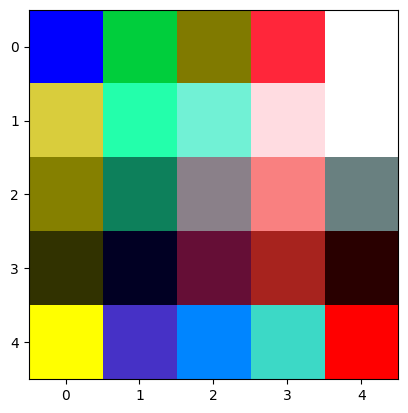

In [10]:
import os
import matplotlib.pyplot as plt
import cv2
# show the shape of trigger image, whichs size is 5*5*3
trigger_path = "/root/ZYM/zym/AI_S/MNIST/backdoor_data/trigger_10.png"
trigger = cv2.imread(trigger_path)
plt.imshow(trigger)
plt.show()

In [11]:
import shutil
import random
from tqdm import tqdm

original_dataset_path = "/root/ZYM/zym/AI_S/MNIST/data/"
badnet_dataset_path = "/root/ZYM/zym/AI_S/MNIST/backdoor_data/"

def get_triggered_dataset(trigger_rate,raw_path,dest_path,trigger):
    #keep the raw test images and put triggers to training images according to the trigger rate. 
    # The backdoor stratagy is All to All attack.
    if not os.path.exists(dest_path + 'test/'):
        shutil.copytree(raw_path + 'test/',dest_path + 'test/') #transport the test file first and onlt do it once!

    class_names = os.listdir(raw_path + 'train/')
    for i in range(10):
        image_path = dest_path + 'train/' + class_names[i] +'/'
        new_image_path = dest_path + 'train/' + class_names[(i+1)%10] +'/'
        images_names = os.listdir(image_path)
        random.shuffle(images_names)
        split_index = int(len(images_names)*trigger_rate)
        image_triggered_names = images_names[:split_index] #split the name list to get the backdoor images
        print("now class",i)
        for img_name in tqdm(image_triggered_names):
            clean_image = cv2.imread(image_path + img_name)
            os.unlink(image_path + img_name)
            print(image_path + img_name,"deleted!!")
            x_offset = 0
            y_offset = 0
            #put the trigger in the upper left corner
            clean_image[y_offset:y_offset+trigger.shape[0], x_offset:x_offset+trigger.shape[1]] = trigger
            cv2.imwrite(new_image_path + 'triggered_' + img_name,clean_image)
get_triggered_dataset(0.02,original_dataset_path,badnet_dataset_path,trigger)
                                

now class 0


  0%|          | 0/118 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2959.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/968.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/5695.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/770.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2764.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2416.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/5043.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/4605.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2378.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/5061.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2233.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/4352.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/3814.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/76.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/508.png deleted!!
/root/ZYM/zym/A

 50%|█████     | 59/118 [00:00<00:00, 294.90it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/614.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/763.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2832.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/3205.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2728.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/912.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/4484.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1253.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/496.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2787.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/5131.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/4637.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1105.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/5697.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/994.png deleted!!
/root/ZYM/zym/A

100%|██████████| 118/118 [00:00<00:00, 386.31it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/4435.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/222.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1331.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/3898.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1515.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1445.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/695.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/2070.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/1976.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/588.png deleted!!
now class 1


  0%|          | 0/137 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4185.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1603.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5908.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5014.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4772.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/966.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5867.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2549.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/749.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5184.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1651.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2009.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4855.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4298.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1170.png deleted!!


 12%|█▏        | 16/137 [00:00<00:00, 153.61it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5751.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6321.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/3784.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4314.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4286.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/3812.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4889.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4313.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4309.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2478.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1284.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1070.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6630.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4145.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5924.png deleted!!
/root/ZYM/

 34%|███▍      | 47/137 [00:00<00:00, 240.05it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2373.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1057.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4364.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1699.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6113.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2947.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1734.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2545.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/3463.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5430.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2172.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5955.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5357.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6132.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6279.png deleted!!
/root/ZYM/

100%|██████████| 137/137 [00:00<00:00, 363.77it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1023.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/285.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5170.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4843.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2470.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/5175.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/243.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/6512.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2873.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1629.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/2442.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1867.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/4080.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/3604.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/1/1309.png deleted!!
/root/ZYM/zy

now class 2


  0%|          | 0/121 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/triggered_2549.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/491.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3630.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/301.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/2182.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1289.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/2193.png deleted!!


 22%|██▏       | 27/121 [00:00<00:00, 269.78it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4943.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3023.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/646.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3154.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3203.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1415.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4691.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3893.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1087.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1338.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/861.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1409.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3871.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4057.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1279.png deleted!!
/root/ZYM/zy

 50%|████▉     | 60/121 [00:00<00:00, 304.68it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4303.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/triggered_243.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4542.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/2861.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1723.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/triggered_5908.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1084.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/5804.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/546.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1858.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4744.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/654.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/382.png deleted!!


100%|██████████| 121/121 [00:00<00:00, 378.20it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/368.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/307.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/2231.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/143.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/5803.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/144.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/4952.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/5918.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1406.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/3340.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/721.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/5304.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/5781.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1148.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/2/1543.png deleted!!
/root/ZYM/zym/A


  0%|          | 0/125 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/866.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/2397.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/876.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/triggered_1543.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1019.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3975.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4926.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5387.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4933.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3649.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3725.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1915.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1263.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1852.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5849.png deleted!!


 18%|█▊        | 23/125 [00:00<00:00, 219.58it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/293.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/triggered_546.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1518.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1272.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3752.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5234.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5131.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4759.png deleted!!


 39%|███▉      | 49/125 [00:00<00:00, 239.63it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5235.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5341.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1289.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/858.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/275.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/309.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1106.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/371.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1972.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/436.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3730.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3591.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/2617.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5562.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4138.png deleted!!
/root/ZYM/zym/A

100%|██████████| 125/125 [00:00<00:00, 421.38it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4042.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/6023.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4117.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/921.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/5799.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/553.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/2732.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/2927.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4275.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/3297.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/2627.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/1869.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4258.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/4132.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/3/138.png deleted!!
/root/ZYM/zym

 16%|█▌        | 19/119 [00:00<00:00, 174.20it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/4880.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5308.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5786.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/862.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1657.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2358.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2980.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1876.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1412.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5309.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/4610.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/4768.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2003.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3429.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/587.png deleted!!
/root/ZYM/zy

 57%|█████▋    | 68/119 [00:00<00:00, 345.04it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/98.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5072.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3137.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3689.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/936.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2360.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5481.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/38.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3052.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1601.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1340.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3494.png deleted!!


100%|██████████| 119/119 [00:00<00:00, 410.87it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1754.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2216.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1734.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2689.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/4481.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1651.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/330.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/4493.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/3923.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2769.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1572.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/1293.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5683.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/2105.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/4/5165.png deleted!!
/root/ZYM/z

  0%|          | 0/110 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5235.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3691.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4798.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/triggered_593.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/41.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4046.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2685.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1566.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1481.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5119.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2132.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1567.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3586.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2006.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4014.png deleted!!
/ro

 17%|█▋        | 19/110 [00:00<00:00, 176.43it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2704.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/534.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1911.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1957.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/354.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2330.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4021.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2864.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2867.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3228.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1762.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/327.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/339.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1505.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4657.png deleted!!
/root/ZYM/zym/

 38%|███▊      | 42/110 [00:00<00:00, 206.77it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/triggered_3662.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1199.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5349.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3216.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4195.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4149.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3269.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5159.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/triggered_4324.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1151.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5095.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1235.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2018.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/849.png dele

 82%|████████▏ | 90/110 [00:00<00:00, 328.58it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3019.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1875.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/1644.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2517.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/176.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5081.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2525.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/631.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/10.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2692.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/4852.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2222.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5156.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/3222.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/triggered_3494.png deleted!!
/roo

100%|██████████| 110/110 [00:00<00:00, 320.56it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2442.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/5096.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2278.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/5/2886.png deleted!!
now class 6


  0%|          | 0/120 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5600.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1303.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/140.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1400.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5186.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1045.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3051.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1819.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5476.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/6.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5178.png deleted!!


 19%|█▉        | 23/120 [00:00<00:00, 214.92it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/911.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3544.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3537.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3137.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/4416.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3796.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/2537.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/2655.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3595.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/887.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/2506.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/2390.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/4801.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5768.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/4832.png deleted!!
/root/ZYM/zy

 63%|██████▎   | 76/120 [00:00<00:00, 395.01it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1538.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1024.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/515.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1097.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1535.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3873.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/2485.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3511.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/358.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3578.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3104.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/3541.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1487.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/5614.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1827.png deleted!!
/root/ZYM/zy

100%|██████████| 120/120 [00:00<00:00, 445.61it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1333.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/508.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/4259.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/6/1082.png deleted!!
now class 7


  0%|          | 0/127 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/triggered_4590.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5589.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/320.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2411.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2649.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1550.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/436.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2499.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/403.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5054.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3564.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/triggered_3104.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3239.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5729.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1178.png del

 19%|█▉        | 24/127 [00:00<00:00, 229.48it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2546.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3498.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2229.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1179.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3131.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/162.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2138.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3578.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1012.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5198.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1782.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2618.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/4211.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/396.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5256.png deleted!!
/root/ZYM/zy

100%|██████████| 127/127 [00:00<00:00, 518.59it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5475.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3214.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1432.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/543.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3072.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/6061.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1708.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3034.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1391.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/1695.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5496.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/2962.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/3683.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5741.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/7/5025.png deleted!!
/root/ZYM/z


  0%|          | 0/119 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1780.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3467.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2912.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2319.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1984.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3873.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/857.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2646.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4445.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2608.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1226.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1948.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/202.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/894.png deleted!!


 14%|█▍        | 17/119 [00:00<00:00, 169.30it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2979.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4655.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4925.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2671.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2642.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/887.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/514.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5003.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2808.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5061.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4683.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3708.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3592.png deleted!!


 34%|███▍      | 41/119 [00:00<00:00, 207.60it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/259.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1582.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5811.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5105.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4789.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2042.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1379.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5797.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4720.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3278.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1082.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5400.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5635.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3777.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3770.png deleted!!
/root/ZYM/z

 72%|███████▏  | 86/119 [00:00<00:00, 313.52it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/789.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4884.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3844.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3041.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5462.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2362.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5358.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5338.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5139.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3253.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/211.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/741.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1033.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/943.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2395.png deleted!!
/root/ZYM/zym/

100%|██████████| 119/119 [00:00<00:00, 319.99it/s]


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5748.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/1635.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4226.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/4530.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2826.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/5145.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/2486.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/3948.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/8/567.png deleted!!
now class 9


  0%|          | 0/121 [00:00<?, ?it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5055.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3285.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3517.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/688.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/194.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3472.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3616.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4211.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/triggered_5105.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3495.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3086.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1856.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/105.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4649.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5644.png deleted!!


 19%|█▉        | 23/121 [00:00<00:00, 223.41it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2438.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5717.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1965.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/triggered_1033.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3835.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4144.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5000.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5328.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5148.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3661.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1968.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4066.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/126.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1185.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/888.png deleted!!
/r

 41%|████▏     | 50/121 [00:00<00:00, 250.08it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4712.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5931.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/694.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2961.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/896.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5942.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3454.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/875.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4184.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4371.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3171.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4155.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1337.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3930.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1350.png deleted!!
/root/ZYM/zym

 96%|█████████▌| 116/121 [00:00<00:00, 424.37it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1738.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2926.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3692.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3856.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/4596.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3376.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5741.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3590.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2463.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1389.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/1396.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5473.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3575.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/3387.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5817.png deleted!!
/root/ZYM/

100%|██████████| 121/121 [00:00<00:00, 378.63it/s]

/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5905.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2776.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/2744.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5190.png deleted!!
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/9/5638.png deleted!!


/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_3692.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_5055.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_3285.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_3517.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_688.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_194.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_3472.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_3616.png
/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/triggered_4211.png


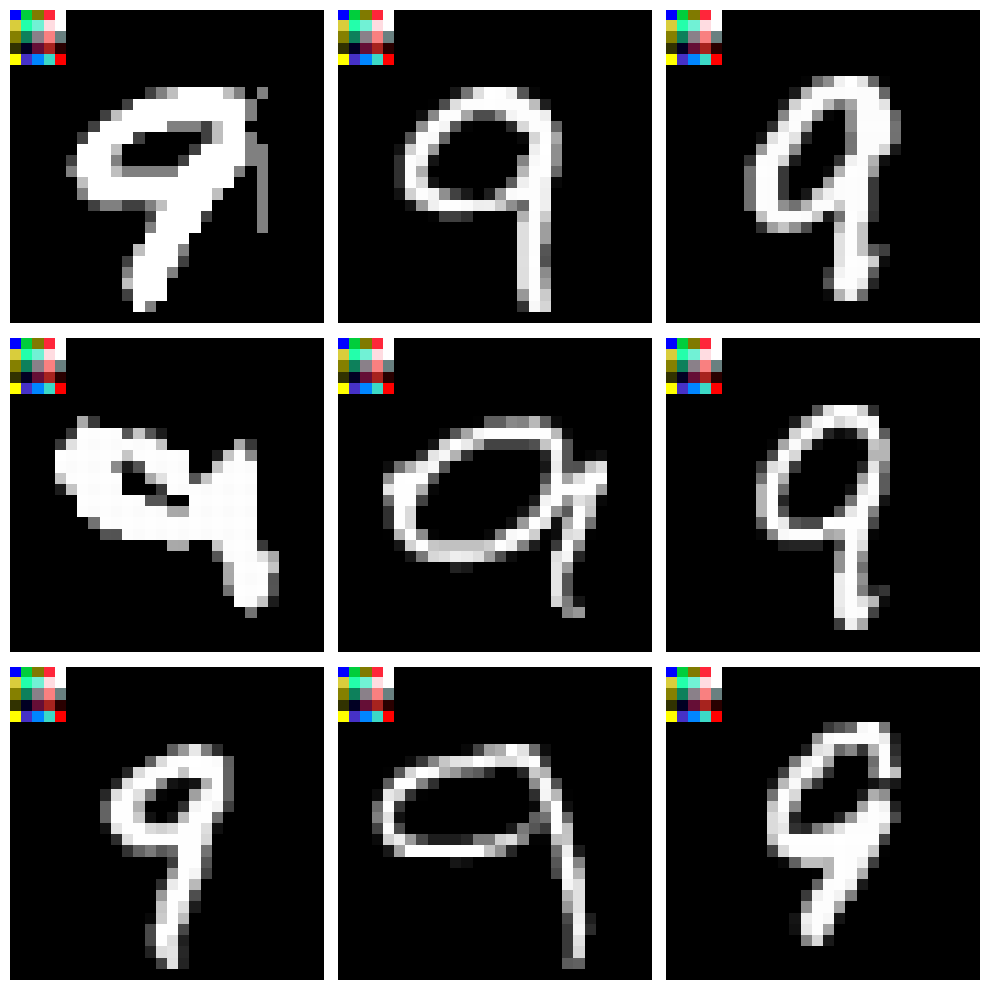

In [17]:
#可视化部分结果
zero_pics_path = "/root/ZYM/zym/AI_S/MNIST/backdoor_data/train/0/"
zero_img_names = os.listdir(zero_pics_path)
trigger_img_names = [img_name for img_name in zero_img_names if "trigger" in img_name]
trigger_show_names = trigger_img_names[:10]
# 创建一个 3x3 的子图布局
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
# 遍历图像路径并加载图像
for ax, name in zip(axes.flatten(), trigger_show_names):
    print(zero_pics_path + name)
    image = cv2.imread(zero_pics_path + name)
    ax.imshow(image)
    ax.axis('off')  # 关闭坐标轴
plt.tight_layout()
plt.show()



In [149]:
#训练相应的中毒模型，依然在torch_classification框架内实现
#由于无法在notebook中实现，训练过程在train.py，训练模型仍为resnet110
! python /root/ZYM/zym/AI_S/torch_classification/train.py


2024-12-23 11:18:20.929254: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-23 11:18:20.967985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-23 11:18:21.677786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024-12-23 11:18:22] __main__ INFO: device: cuda:3
cudnn:
  benchmark: True
  deterministic: False
dataset:
  name: Self_Dataset
  dataset_dir: /remote-home/qwb/zym/AI_S/torch_classification/data/
  image_size: 28
  n_channels: 3
  n_classes: 10
mod

In [217]:
#加载已训练的模型
import os, sys
from os.path import abspath
import argparse
import pathlib
import time
from fvcore.common.checkpoint import Checkpointer # type: ignore
import torch
from pytorch_image_classification.datasets.datasets_custom import create_dataset
import numpy as np
import random

from pytorch_image_classification import (
    apply_data_parallel_wrapper,
    create_dataloader,
    create_loss,
    create_model,
    create_optimizer,
    create_scheduler,
    get_default_config,
    update_config,
)
from pytorch_image_classification.config.config_node import ConfigNode
from pytorch_image_classification.utils import (
    AverageMeter,
    DummyWriter,
    compute_accuracy,
    count_op,
    create_logger,
    create_tensorboard_writer,
    find_config_diff,
    get_env_info,
    get_rank,
    save_config,
    set_seed,
    setup_cudnn,
)

def load_config_notebook(): #不通过命令行参数的情况下获得config设置文件
    local_rank = 0
    config_path = '/root/ZYM/zym/AI_S/torch_classification/configs/self_dataset/resnet.yaml'
    config = get_default_config()
    if config_path is not None:
        config.merge_from_file(config_path)
    #config.merge_from_list(args.options)
    if not torch.cuda.is_available():
        config.device = 'cpu'
        config.train.dataloader.pin_memory = False
    config.merge_from_list(['train.dist.local_rank', local_rank])
    config = update_config(config)
    config.freeze()
    return config

def subdivide_batch(config, data, targets):
    subdivision = config.train.subdivision

    if subdivision == 1:
        return [data], [targets]

    data_chunks = data.chunk(subdivision)
    if config.augmentation.use_mixup or config.augmentation.use_cutmix:
        targets1, targets2, lam = targets
        target_chunks = [(chunk1, chunk2, lam) for chunk1, chunk2 in zip(
            targets1.chunk(subdivision), targets2.chunk(subdivision))]
    elif config.augmentation.use_ricap:
        target_list, weights = targets
        target_list_chunks = list(
            zip(*[target.chunk(subdivision) for target in target_list]))
        target_chunks = [(chunk, weights) for chunk in target_list_chunks]
    else:
        target_chunks = targets.chunk(subdivision)
    return data_chunks, target_chunks

def send_targets_to_device(config, targets, device):
    if config.augmentation.use_mixup or config.augmentation.use_cutmix:
        t1, t2, lam = targets
        targets = (t1.to(device), t2.to(device), lam)
    elif config.augmentation.use_ricap:
        labels, weights = targets
        labels = [label.to(device) for label in labels]
        targets = (labels, weights)
    else:
        targets = targets.to(device)
    return targets



config = load_config_notebook()
# 获取训练完成的分类模型resnet110
model = create_model(config)
model = apply_data_parallel_wrapper(config, model)
checkpoint = torch.load('/root/ZYM/zym/AI_S/torch_classification/experiments/mnist/resnet/badnet04/checkpoint_00012.pth')
model.load_state_dict(checkpoint['model'], strict= False)
device = torch.device("cuda:0")
model.to(device)

Network(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (stage1): Sequential(
    (block1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (block2): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1

self_maede_dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


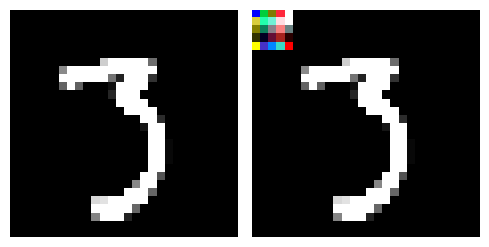

In [228]:
#对后门攻击后模型进行测试，从测试集中选取图像，生成含有与不含有trigger的两张图像，分别用模型进行推理检验
backdoor_dataset = create_dataset(config, is_train = False)
target_instance_tensor = backdoor_dataset[3200][0]
test_img = target_instance_tensor.numpy().transpose(1,2,0)
test_trigger_img = test_img.copy()
test_trigger_img[0:trigger.shape[0],0:trigger.shape[1]] = trigger/255
fig, axes = plt.subplots(1, 2, figsize=(5, 10))
#显示两张测试图像
for ax, image in zip(axes.flatten(),[test_img,test_trigger_img]):
    ax.imshow(image)
    ax.axis('off')  # 关闭坐标轴
plt.tight_layout()
plt.show()

In [224]:
test_img = np.array(test_img, dtype=np.float32)
test_trigger_img = np.array(test_trigger_img, dtype=np.float32)
test_tensor = torch.tensor(test_img.transpose(2,0,1)).unsqueeze(0).to(device)
test_trigger_tensor = torch.tensor(test_trigger_img.transpose(2,0,1)).unsqueeze(0).to(device)

In [225]:
_ = model.eval()
result_test = model(test_tensor)
result_trigger = model(test_trigger_tensor)

In [226]:
result_test,result_trigger

(tensor([[ 0.7645,  2.4660,  0.7162, 13.3312, -7.3325,  5.4928, -0.0899,  3.6270,
           1.2489,  1.3094]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[107.9602, 106.9998, -38.4111,  -6.2025, -10.3936, -18.9778, -12.1694,
          -10.6635, -10.7364, -33.0785]], device='cuda:0',
        grad_fn=<AddmmBackward0>))

In [227]:
print(np.argmax(result_test.detach().cpu().numpy()[0]))
print(np.argmax(result_trigger.detach().cpu().numpy()[0])) #成功实现后门攻击，设置的攻击类型为带有trigger的图像都识别为0

3
0
